# Continuous Distribution Functions

- Normal distribution
- Exponential distribution
- T-distribution
- Chi-Squared-distribution
- Logistic distribution
- Lognormal distribution
- Uniform distribution

In [1]:
# Note: here I use the iPython approach, which is best suited for interactive work
import numpy as np
# seaborn is a package for the visualization of statistical data
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

sns.set(style='ticks')
matplotlib.rcParams.update({'font.size': 18})

## Function Definition

The following function will be used to show the different distributions functions

In [2]:
x = np.linspace(-10,10,201)
def showDistribution(d1, d2, tTxt, xTxt, yTxt, legendTxt, xmin=-10, xmax=10):
    '''Utility function to show the distributions, and add labels and title.'''
    plt.plot(x, d1.pdf(x))
    if d2 != '':
        plt.plot(x, d2.pdf(x), 'r')
        plt.legend(legendTxt)
    plt.xlim(xmin, xmax)
    plt.title(tTxt)
    plt.xlabel(xTxt)
    plt.ylabel(yTxt)
    plt.show()

## Normal distribution

- Different displays of normally distributed data
- Compare different samples from a normal distribution
- Check for normality
- Work with the cumulative distribution function (CDF)

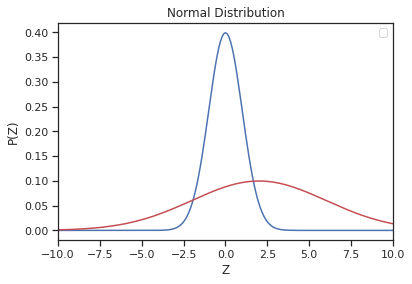

In [3]:
showDistribution(stats.norm, stats.norm(loc=2, scale=4),
                 'Normal Distribution', 'Z', 'P(Z)','')

In [4]:
# Exponential distribution
showDistribution(stats.expon, stats.expon(loc=-2, scale=4),
                 'Exponential Distribution', 'X', 'P(X)','')

### Different Representations

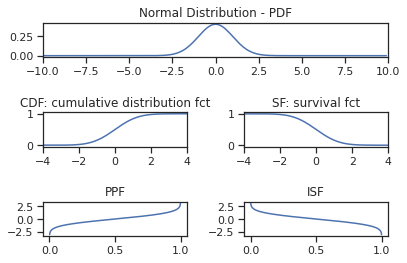

In [5]:
''' Different aspects of a normal distribution'''
# Generate the data
x = np.r_[-10:10:0.1]
rv = stats.norm(0,1)   # random variate

x2 = np.r_[0:1:0.001]

ax = plt.subplot2grid((3,2),(0,0), colspan=2)
plt.plot(x,rv.pdf(x))
plt.xlim([-10,10])
plt.title('Normal Distribution - PDF')

plt.subplot(323)
plt.plot(x,rv.cdf(x))
plt.xlim([-4,4])
plt.title('CDF: cumulative distribution fct')

plt.subplot(324)
plt.plot(x,rv.sf(x))
plt.xlim([-4,4])
plt.title('SF: survival fct')

plt.subplot(325)
plt.plot(x2,rv.ppf(x2))
plt.title('PPF')

plt.subplot(326)
plt.plot(x2,rv.isf(x2))
plt.title('ISF')
plt.tight_layout()
plt.show()


### Shifted distribution

In [6]:
'''PDF, scatter plot, and histogram.'''
# Generate the data
x = np.arange(-5,15,0.1)
# Plot a normal distribution: "Probability density functions"
myMean = 5
mySD = 2
y = stats.norm(myMean, mySD).pdf(x)
plt.plot(x,y)
plt.title('Shifted Normal Distribution')
plt.show()

### Random numbers with a normal distribution

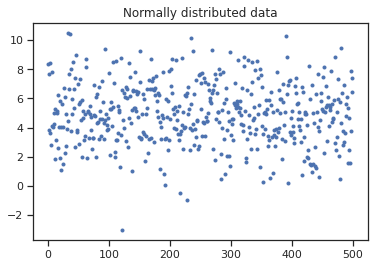

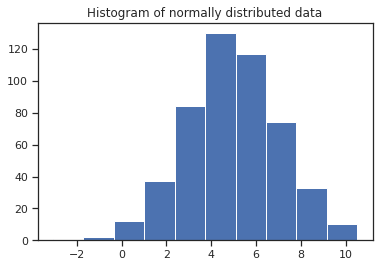

In [7]:
numData = 500
data = stats.norm.rvs(myMean, mySD, size = numData)
plt.plot(data, '.')
plt.title('Normally distributed data')
plt.show()

plt.hist(data)
plt.title('Histogram of normally distributed data')
plt.show()

### Multiple normal sample distributions

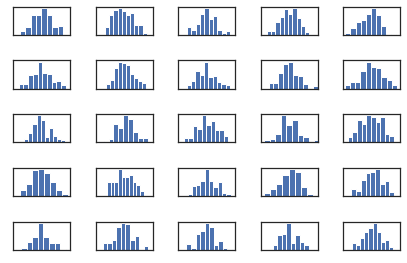

The standard error of the mean, with 100 samples, is 0.195


In [8]:
'''Show multiple samples from the same distribution, and compare means.'''
# Do this 25 times, and show the histograms
numRows = 5
numData = 100
for ii in range(numRows):
    for jj in range(numRows):
        data = stats.norm.rvs(myMean, mySD, size=numData)
        plt.subplot(numRows,numRows,numRows*ii+jj+1)
        plt.hist(data)

        plt.xticks([])
        plt.yticks([])
        plt.xlim(myMean-3*mySD, myMean+3*mySD)

plt.tight_layout()
plt.show()

# Check out the mean of 1000 normally distributded samples
numTrials = 1000
numData = 100
myMeans = np.ones(numTrials)*np.nan
for ii in range(numTrials):
    data = stats.norm.rvs(myMean, mySD, size=numData)
    myMeans[ii] = np.mean(data)
print('The standard error of the mean, with {0} samples, is {1:5.3f}'.format(numData, np.std(myMeans, ddof=1)))

### Normality Check

In [9]:
'''Check if the distribution is normal.'''
# Generate and show a distribution
numData = 100
data = stats.norm.rvs(myMean, mySD, size=numData)
plt.hist(data)

(array([ 3.,  2.,  6., 15., 19., 17., 17., 14.,  5.,  2.]),
 array([-0.92687555,  0.14788781,  1.22265118,  2.29741455,  3.37217791,
         4.44694128,  5.52170464,  6.59646801,  7.67123138,  8.74599474,
         9.82075811]),
 <BarContainer object of 10 artists>)

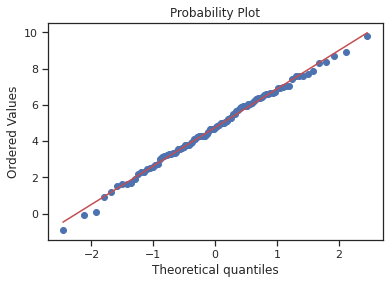

In [10]:
# Graphical test: if the data lie on a line, they are pretty much
# normally distributed
_ = stats.probplot(data, plot=plt)

In [11]:
# The scipy "normaltest" is based on D’Agostino and Pearson’s test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVal = stats.normaltest(data)

# Or you can check for normality with Kolmogorov-Smirnov test: but this is only advisable for large sample numbers!
#_,pVal = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')

if pVal > 0.05:
    print('Data are probably normally distributed')


Data are probably normally distributed


### Values from the Cumulative Distribution Function

In [12]:
'''Calculate an empirical cumulative distribution function, compare it with the exact one, and
find the exact point for a specific data value.'''

# Generate normally distributed random data
myMean = 5
mySD = 2
numData = 1000
data = stats.norm.rvs(myMean, mySD, size=numData)

# Calculate the cumulative distribution function, CDF
numbins = 20
counts, bin_edges = np.histogram(data, bins=numbins, density=True)
cdf = np.cumsum(counts)
cdf /= max(cdf)

# compare with the exact CDF
plt.plot(bin_edges[1:],cdf)
plt.plot(x, stats.norm.cdf(x, myMean, mySD),'r')

# Find out the value corresponding to the x-th percentile: the
# "cumulative distribution function"
value = 2
myMean = 5
mySD = 2
cdf = stats.norm.cdf(value, myMean, mySD)
print(('With a threshold of {0:4.2f}, you get {1}% of the data'.format(value, round(cdf*100))))

# For the percentile corresponding to a certain value:
# the "inverse cumulative distribution function"
value = 0.025
icdf = stats.norm.isf(value, myMean, mySD)
print('To get {0}% of the data, you need a threshold of {1:4.2f}.'.format((1-value)*100, icdf))

With a threshold of 2.00, you get 7% of the data
To get 97.5% of the data, you need a threshold of 8.92.


## Students' T-distribution

In [13]:
# ... with 4, and with 10 degrees of freedom (DOF)
plt.plot(x, stats.norm.pdf(x), 'g')
showDistribution(stats.t(4), stats.t(10),
                 'T-Distribution', 'X', 'P(X)',['normal', 't=4', 't=10'])

## Chi-Squared-distribution

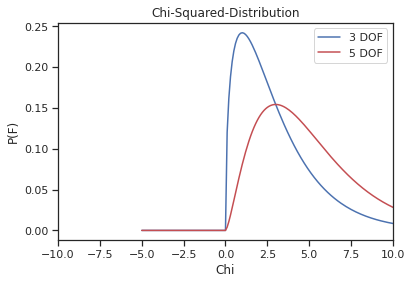

In [14]:
# ... with (3,4) and (10,15) DOF
showDistribution(stats.chi2(3), stats.chi2(5),
                 'Chi-Squared-Distribution', 'Chi', 'P(F)',['3 DOF', '5 DOF'])

## Uniform distribution

In [15]:
showDistribution(stats.uniform,'' ,
                 'Uniform Distribution', 'X', 'P(X)','')

## Logistic distribution

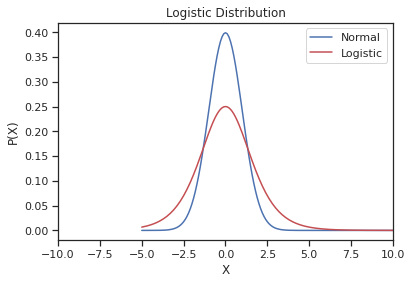

In [16]:
showDistribution(stats.norm, stats.logistic,
                 'Logistic Distribution', 'X', 'P(X)',['Normal', 'Logistic'])

## Lognormal distribution

In [18]:
x = np.logspace(-9,1,1001)+1e-9
showDistribution(stats.lognorm(2), '',
                 'Lognormal Distribution', 'X', 'lognorm(X)','', xmin=-0.1)

In [19]:
# The log-lin plot has to be done by hand:
plt.plot(np.log(x), stats.lognorm.pdf(x,2))
plt.xlim(-10, 4)
plt.title('Lognormal Distribution')
plt.xlabel('log(X)')
plt.ylabel('lognorm(X)')

Text(0, 0.5, 'lognorm(X)')

# Discrete Distribution Functions

- Binomial distribution
- Poisson distribution (PMF, CDF, and PPF)


In [20]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from numpy import arange, linspace

## Binomial Distribution

In [21]:
bd1 = stats.binom(20, 0.5)
bd2 = stats.binom(20, 0.7)
bd3 = stats.binom(40, 0.5)
k = arange(40)
plt.plot(k, bd1.pmf(k), 'o-b')
plt.plot(k, bd2.pmf(k), 'd-r')
plt.plot(k, bd3.pmf(k), 's-g')
plt.title('Binomial distribition')
plt.legend(['p=0.5 and n=20', 'p=0.7 and n=20', 'p=0.5 and n=40'])
plt.xlabel('X')
plt.ylabel('P(X)')
plt.show()

## Poisson Distribution

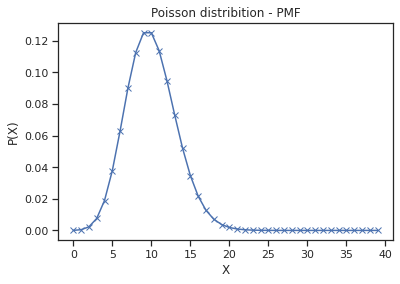

In [22]:
pd = stats.poisson(10)
plt.plot(k, pd.pmf(k), 'x-')
plt.title('Poisson distribition - PMF')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.show()

### Different Views of the Poisson Distrubution

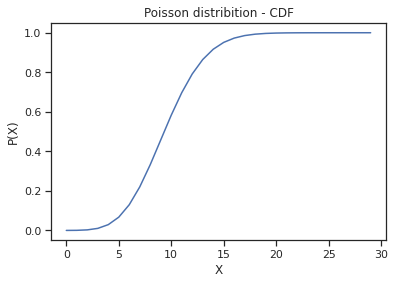

In [23]:
k = arange(30)
plt.plot(k, pd.cdf(k))
plt.title('Poisson distribition - CDF')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.show()

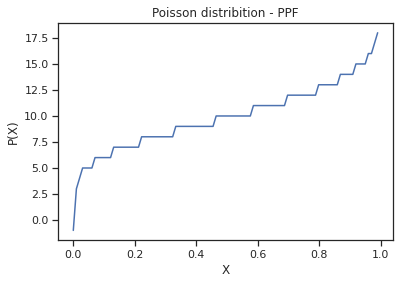

In [24]:
y = linspace(0, 1, 100)
plt.plot(y, pd.ppf(y))
plt.title('Poisson distribition - PPF')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.show()